In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.stats import beta, norm, bernoulli

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from decimal import Decimal

import ID3
 # decision tree module



In [70]:
import os
# CHANGED DIRECTORY    
path = 'c:\\Users\\Gur Levy\\Desktop\\UVA\\YEAR 2\\SEM2\\DE CODING PORTFOLIO\\DE_PORTFOLIO\\WB_5\\MANCHESTER CITY FC'

In [71]:
new_column_names = {'Total actions / successful': 'Total actions',
                        'Unnamed: 6': 'Successful actions',
                        'Shots / on target': 'Shots', 
                        'Unnamed: 10': 'Shots on target',
                        'Passes / accurate': 'Total passes',
                        'Unnamed: 13': 'Accurate passes',
                        'Long passes / accurate': 'Long passes',
                        'Unnamed: 15': 'Accurate long passes',
                        'Crosses / accurate': 'Crosses',
                        'Unnamed: 17': 'Accurate crosses',
                        'Dribbles / successful': 'Dribbles',
                        'Unnamed: 19': 'Successful dribbles',
                        'Duels / won': 'Duels',
                        'Unnamed: 21': 'Duels won',
                        'Aerial duels / won': 'Aerial duels',
                        'Unnamed: 23': 'Aerial duels won', 
                        'Losses / own half': 'Losses',
                        'Unnamed: 26': 'Losses in own half',
                        'Recoveries / opp. half': 'Recoveries',
                        'Unnamed: 28': 'Opp. half recoveries',
                        'Defensive duels / won': 'Defensive duels',
                        'Unnamed: 32': 'Defensive duels won',
                        'Loose ball duels / won': 'Loose ball duels',
                        'Unnamed: 34': 'Loose ball duels won',
                        'Sliding tackles / successful': 'Sliding tackles',
                        'Unnamed: 36': 'Successful sliding tackles',
                        'Offensive duels / won': 'Offensive duel',
                        'Unnamed: 43': 'Offensive duels won',
                        'Through passes / accurate': 'Through passes',
                        'Unnamed: 49': 'Accurate through passes',
                        'Passes to final third / accurate': 'Passes to final third',
                        'Unnamed: 53': 'Accurate passes to final third',
                        'Passes to penalty area / accurate': 'Passes to penalty area',
                        'Unnamed: 55': 'Accurate passes to penalty area',
                        'Forward passes / accurate': 'Forward passes',
                        'Unnamed: 58': 'Accurate forward passes',
                        'Back passes / accurate': 'Back passes',
                        'Unnamed: 60': 'Accurate back passes',
                        'Passes to GK / accurate': 'Passes to GK',
                        'Unnamed: 68': 'Accurate passes to GK'
                        }

for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith('.xlsx'):
            file_path = os.path.join(root, file)
            # Read the Excel file into a DataFrame
            df = pd.read_excel(file_path)
            
            # Rename columns using the mapping
            df.rename(columns=new_column_names, inplace=True)
            
            # Save the DataFrame back to the Excel file
            df.to_excel(file_path, index=False)


In [72]:
df = pd.DataFrame()

# Get a list of all files in the folder
files = os.listdir(path)

# Iterate over each file
for file_name in files:
    # Check if the file is an Excel file
    if file_name.endswith('.xlsx'):
        file_path = os.path.join(path, file_name)
        
        # Read the Excel file into a DataFrame
        data = pd.read_excel(file_path)
        
        # Concatenate the DataFrame to the main DataFrame 'df'
        df = pd.concat([df,data])
        


In [73]:
print(df)

                               Match                    Competition  \
0                Spain - Germany 1:1               World. World Cup   
1             Spain - Costa Rica 7:0               World. World Cup   
2                 Jordan - Spain 1:3              World. Friendlies   
3    Manchester City - Brentford 1:2        England. Premier League   
4      Manchester City - Chelsea 2:0           England. Carabao Cup   
..                               ...                            ...   
200       Spain U17 - France U17 3:1  Europe. UEFA U17 Championship   
201      Spain U17 - Croatia U17 1:1  Europe. UEFA U17 Championship   
202        Spain U17 - Italy U17 3:1  Europe. UEFA U17 Championship   
203       Turkey U17 - Spain U17 2:3  Europe. UEFA U17 Championship   
204     Slovakia U17 - Spain U17 0:6  Europe. UEFA U17 Championship   

           Date Position  Minutes played  Total actions  Successful actions  \
0    2022-11-27      LCB              98            108             

In [74]:
print(df[df['Competition'] == 'England. Premier League'].shape)

(1964, 72)


In [47]:
df = df[df['Competition'] == 'England. Premier League']
print(df)


                                            Match              Competition  \
3                 Manchester City - Brentford 1:2  England. Premier League   
6            Leicester City - Manchester City 0:1  England. Premier League   
7                  Manchester City - Brighton 3:1  England. Premier League   
10        Manchester City - Manchester United 6:3  England. Premier League   
11              Manchester City - Aston Villa 3:2  England. Premier League   
..                                            ...                      ...   
4               Manchester City - Southampton 4:0  England. Premier League   
6         Manchester City - Manchester United 6:3  England. Premier League   
9   Wolverhampton Wanderers - Manchester City 0:3  England. Premier League   
11        Manchester City - Nottingham Forest 6:0  England. Premier League   
12           Manchester City - Crystal Palace 4:2  England. Premier League   

          Date  Position  Minutes played  Total actions  Succes

In [48]:
import pandas as pd

# Create a new column 'Outcome' to represent whether Manchester City won the game or not
def extract_outcome(match):
    home_team, away_team_score = match.split(' - ')
    away_team, score = ' '.join(away_team_score.split()[:-1]), away_team_score.split()[-1]
    home_score, away_score = map(int, score.split(':'))
    print(f"Home Team: {home_team}, Away Team: {away_team}, Home Score: {home_score}, Away Score: {away_score}")
    if home_team == 'Manchester City':
        if home_score > away_score:
            return 1
        elif home_score < away_score:
            return 0
        else:
            return None  
    elif away_team == 'Manchester City':
        if away_score > home_score:
            return 1
        elif away_score < home_score:
            return 0
        else:
            return None 
    else:
        return None  

df['Outcome'] = df['Match'].apply(extract_outcome)





Home Team: Manchester City, Away Team: Brentford, Home Score: 1, Away Score: 2
Home Team: Leicester City, Away Team: Manchester City, Home Score: 0, Away Score: 1
Home Team: Manchester City, Away Team: Brighton, Home Score: 3, Away Score: 1
Home Team: Manchester City, Away Team: Manchester United, Home Score: 6, Away Score: 3
Home Team: Manchester City, Away Team: Aston Villa, Home Score: 3, Away Score: 2
Home Team: West Ham United, Away Team: Manchester City, Home Score: 2, Away Score: 2
Home Team: Wolverhampton Wanderers, Away Team: Manchester City, Home Score: 1, Away Score: 5
Home Team: Manchester City, Away Team: Newcastle United, Home Score: 5, Away Score: 0
Home Team: Leeds United, Away Team: Manchester City, Home Score: 0, Away Score: 4
Home Team: Manchester City, Away Team: Watford, Home Score: 5, Away Score: 1
Home Team: Manchester City, Away Team: Brighton, Home Score: 3, Away Score: 0
Home Team: Manchester City, Away Team: Liverpool, Home Score: 2, Away Score: 2
Home Team: 

In [49]:
print(df)

                                            Match              Competition  \
3                 Manchester City - Brentford 1:2  England. Premier League   
6            Leicester City - Manchester City 0:1  England. Premier League   
7                  Manchester City - Brighton 3:1  England. Premier League   
10        Manchester City - Manchester United 6:3  England. Premier League   
11              Manchester City - Aston Villa 3:2  England. Premier League   
..                                            ...                      ...   
4               Manchester City - Southampton 4:0  England. Premier League   
6         Manchester City - Manchester United 6:3  England. Premier League   
9   Wolverhampton Wanderers - Manchester City 0:3  England. Premier League   
11        Manchester City - Nottingham Forest 6:0  England. Premier League   
12           Manchester City - Crystal Palace 4:2  England. Premier League   

          Date  Position  Minutes played  Total actions  Succes

In [50]:
num_matches = 10000
win_rate = 0.7
match_outcomes = np.random.choice([1, 0], size=num_matches, p=[win_rate, 1-win_rate])
test_results = match_outcomes
data = pd.DataFrame({'outcome': match_outcomes, 'test_result': test_results})
# Bayesian inference of Pr(outcome=1 | test=1)
def bayes_theorem(prior, likelihood, evidence):
    return (prior * likelihood) / evidence

# Calculate Bayesian probabilities for the outcome
prior_probability = df['Outcome'].mean()
likelihood = data[data['outcome'] == 1]['test_result'].mean()
probability_testing_positive = data['test_result'].mean()

pr_win_given_positive = bayes_theorem(prior_probability, likelihood, probability_testing_positive)

print('Prior probability of winning:', prior_probability)
print('Likelihood of testing positive given winning:', likelihood)
print('Probability of testing positive:', probability_testing_positive)
print('Pr(win | test=1) = ', pr_win_given_positive)


Prior probability of winning: 0.8526077097505669
Likelihood of testing positive given winning: 1.0
Probability of testing positive: 0.7026
Pr(win | test=1) =  1.2135037144186833


In [51]:
df = df[['Successful actions', 'Goals', 'Shots on target', 'Conceded goals', 'Accurate passes', 'Outcome']]
df

,Successful actions,Goals,Shots on target,Conceded goals,Accurate passes,Outcome
3,80,0,0,0,63,0.0
6,104,0,0,0,94,1.0
7,46,0,0,0,39,1.0
10,17,0,0,0,16,1.0
11,79,0,1,0,71,1.0
...,...,...,...,...,...,...
4,11,0,0,0,9,1.0
6,21,0,0,0,17,1.0
9,12,0,0,0,11,1.0
11,17,0,0,0,15,1.0


In [52]:
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

In [53]:

# Bin 'Successful actions'
df['Successful_actions_cat'] = pd.cut(df['Successful actions'], bins=[0, 30, 40, 50, 60, 70, 120], labels=['below 30', '30-39', '40-49', '50-59', '60-69', 'above 70'])

# Bin 'Goals'
df['Goals_cat'] = pd.cut(df['Goals'], bins=3, labels=['zero', 'one', 'above 1'])

# Bin 'Shots on target'
df['Shots_on_target_cat'] = pd.cut(df['Shots on target'], bins=3, labels=['zero', 'one', 'above 1'])

# Bin 'Conceded goals'
df['Conceded_goals_cat'] = pd.cut(df['Conceded goals'], bins=3, labels=['zero', 'one', 'above 1'])

# Bin 'Accurate passes'
df['Accurate_passes_cat'] = pd.cut(df['Accurate passes'], bins= [0, 30, 40, 50, 60, 70, 120], labels=['below 30', '30-39', '40-49', '50-59', '60-69', 'above 70'])

# Bin 'Outcome'

df['Outcome_cat'] = pd.cut(df['Outcome'], bins=2, labels=['lose', 'win'])


In [54]:
df.head()

,Successful actions,Goals,Shots on target,Conceded goals,Accurate passes,Outcome,Successful_actions_cat,Goals_cat,Shots_on_target_cat,Conceded_goals_cat,Accurate_passes_cat,Outcome_cat
3,80,0,0,0,63,0.0,above 70,zero,zero,zero,60-69,lose
6,104,0,0,0,94,1.0,above 70,zero,zero,zero,above 70,win
7,46,0,0,0,39,1.0,40-49,zero,zero,zero,30-39,win
10,17,0,0,0,16,1.0,below 30,zero,zero,zero,below 30,win
11,79,0,1,0,71,1.0,above 70,zero,zero,zero,above 70,win


In [55]:
# Split the DataFrame into features and target
X = df.drop('Outcome_cat', axis=1)  # Drop the target
y = df['Outcome_cat']  # Target column

y = pd.DataFrame(y, columns=['Outcome_cat'])

# Combine X and y for the ID3 algorithm
data_for_id3 = pd.concat([X, y], axis=1)

# Split the dataset into training and test sets
data_train, data_test = train_test_split(data_for_id3, test_size=0.2, random_state=42)

In [56]:
features = list(data_train.columns[:-1])


for feature in features:
    data_train[feature] = data_train[feature].astype('category')

# Ensure the target column is also categorical
data_train['Outcome_cat'] = data_train['Outcome_cat'].astype('category')


In [57]:
# Replace '?' with `None` or an appropriate value, or drop missing values
data_train.replace('?', np.nan, inplace=True)
data_train.dropna(inplace=True)


In [58]:
decision_tree = ID3.ID3(data_train, data_train, features, 'Outcome_cat')


In [59]:
ID3.print_tree(decision_tree)

Outcome
|--- 0.0
|   |--- lose
|--- 1.0
|   |--- win


In [60]:
test_features = data_test.drop('Outcome_cat', axis=1)

# Use the new prediction function to get predictions for the test set
# default value is used when no result is obtained
predictions = ID3.predictDataset(test_features, decision_tree, default="lose")

# Compare the predictions with the actual values
actual_values = data_test['Outcome_cat'].tolist()
comparison = pd.DataFrame({'Actual': actual_values, 'Predicted': predictions})

print(comparison)

    Actual Predicted
0      win       win
1      win       win
2      win       win
3      win       win
4     lose      lose
..     ...       ...
260    win       win
261    win       win
262    win       win
263    win       win
264    win       win

[265 rows x 2 columns]


Accuracy: 1.0000


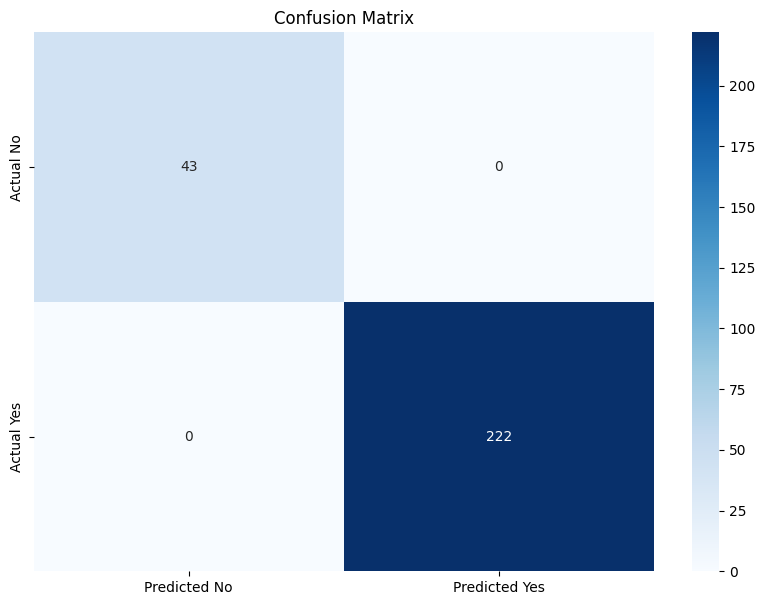

In [61]:
# Lets visualize the accuracy!
accuracy = accuracy_score(actual_values, predictions)
print(f"Accuracy: {accuracy:.4f}")

# Generate the confusion matrix
conf_matrix = confusion_matrix(actual_values, predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix')
#plt.xlabel('Predicted Label')
#plt.ylabel('True Label')
plt.show()

In [62]:
ID3.print_tree(decision_tree)

Outcome
|--- 0.0
|   |--- lose
|--- 1.0
|   |--- win


In [63]:
cat_columns = [col for col in df.columns if col.endswith('_cat')]
# Drop these columns from the DataFrame
df = df.drop(cat_columns, axis=1)

In [64]:
X = df.drop('Outcome', axis=1)  # features
y = df['Outcome']  # target

# Split the dataset into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print([type(X_train.iloc[0,i]) for i in range(len(X_train.columns))])

[<class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>]


In [65]:
# Create a DecisionTreeClassifier object
cart_model = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
cart_model.fit(X_train, y_train);

Accuracy: 0.7660


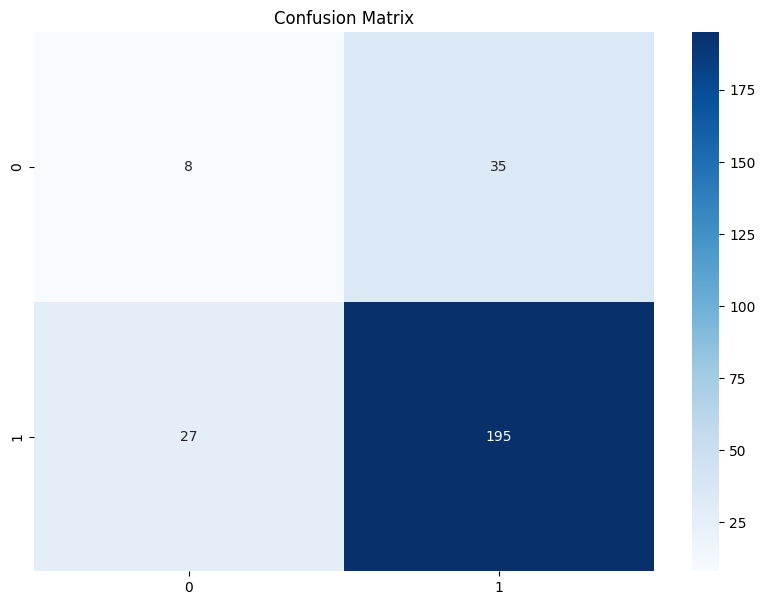

In [66]:
# Making predictions
predictions = cart_model.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")

# Generate and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix')
plt.show()

In [67]:
class_names = y_train.unique().astype(str).tolist()
class_names.sort() 


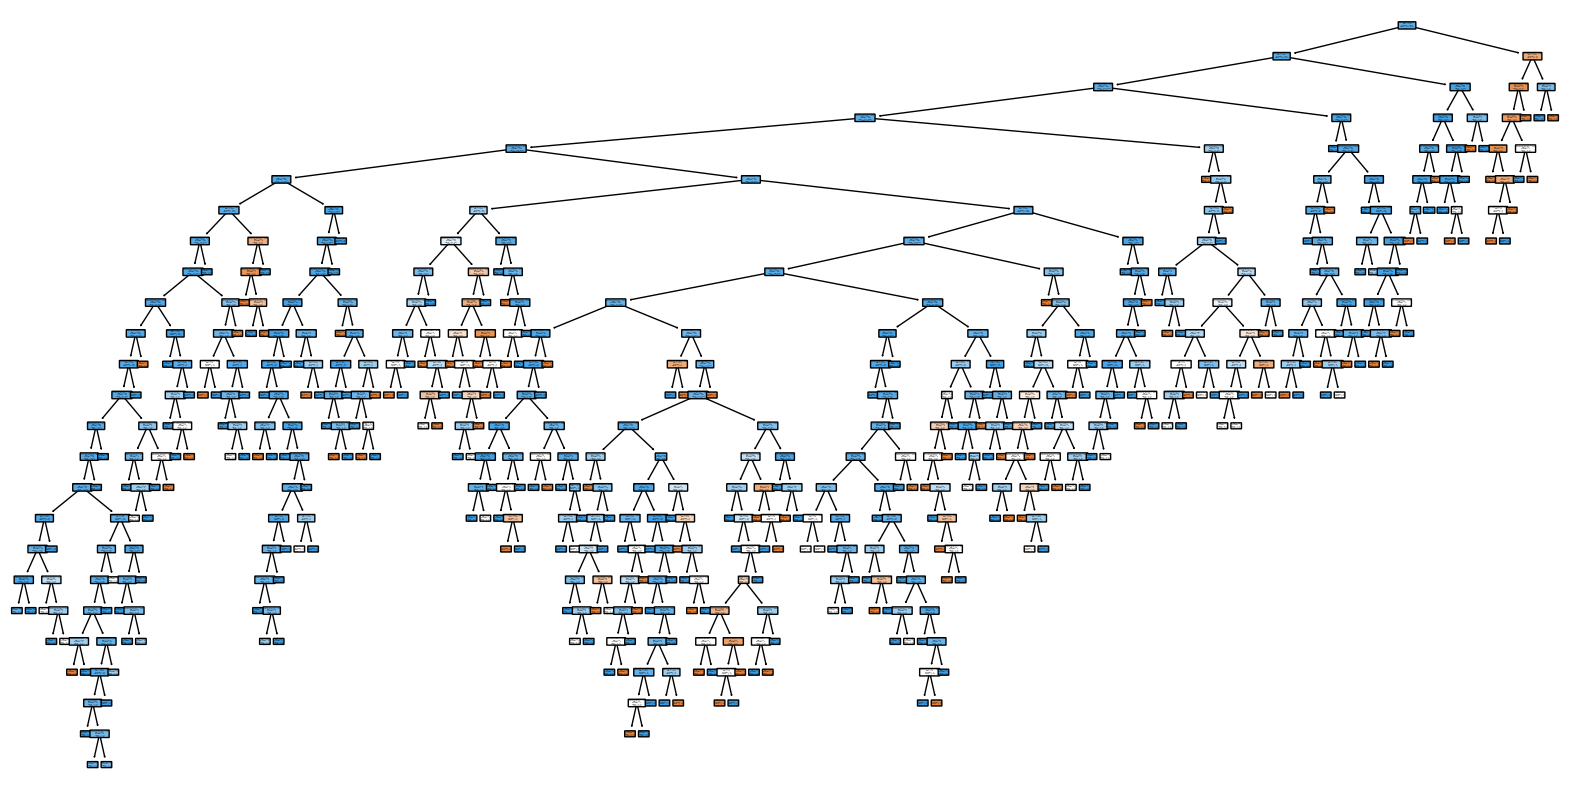

In [68]:
plt.figure(figsize=(20,10))
plot_tree(cart_model, 
          filled=True, 
          rounded=True, 
          class_names=class_names,  
          feature_names=list(X_train.columns))       
plt.show()